<a href="https://colab.research.google.com/github/devjmc/Music21_musescore_Colab/blob/master/BWV999_OnlyChords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BWV999
Reduce the BWV999 only to chords to make it easy to remember and get the structure

In [0]:
#Enable musescore to work in Colab
!apt-get -qq install -y xvfb
import os
os.system('/usr/bin/Xvfb :99 -screen 0 1024x768x24 &')
os.environ['DISPLAY'] = ':99'
!apt-get -qq install -y musescore

In [0]:
from music21 import *
#Set music21 environment so it can find musescore
us=environment.UserSettings()
us['musescoreDirectPNGPath']='/usr/bin/mscore'

In [0]:
def myAddLyric(c, liric):
    mystr=liric
    while len(mystr)>12:
        c.addLyric(mystr[0:12])
        mystr=mystr[12:]
    c.addLyric(mystr)


In [0]:
#s = corpus.parse('bach/bwv108.6.xml')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
s = converter.parse('/content/drive/My Drive/Colab Notebooks/music/Prelude_in_C_minor_-_BWV_999_-_Bach.mxl')

In [0]:
chords0=s.parts[0].makeChords(minimumWindowSize=4,
                            makeRests=False)

In [0]:
chords1=s.parts[1].makeChords(minimumWindowSize=4,
                            makeRests=False)

I tried to create another score using the original one as template but did not work when saving/showing (reporting error in PartStaff missing number). So, I insert the chords in the original score rather than save them separately, and later remove the first two original parts. 

In [0]:
s.insert(0,chords0)
s.insert(0,chords1)

In [9]:
s.elements

(<music21.text.TextBox "Prelude in...">,
 <music21.text.TextBox "BWV 999">,
 <music21.text.TextBox "Johann Seb...">,
 <music21.stream.PartStaff P1-Staff1>,
 <music21.stream.PartStaff P1-Staff2>,
 <music21.stream.PartStaff P1-Staff1>,
 <music21.stream.PartStaff P1-Staff2>,
 <music21.layout.ScoreLayout>)

In [0]:
s.remove(s.parts[0])

In [0]:
s.remove(s.parts[0])

I remove the 2 first original parts because it is easy to print in musescore later. In musescore, remove the system breaks and page breaks, Select ALL and then increase stretch.

In [12]:
s.elements

(<music21.text.TextBox "Prelude in...">,
 <music21.text.TextBox "BWV 999">,
 <music21.text.TextBox "Johann Seb...">,
 <music21.stream.PartStaff P1-Staff1>,
 <music21.stream.PartStaff P1-Staff2>,
 <music21.layout.ScoreLayout>)

In [0]:
for c in s.recurse().getElementsByClass('Chord'):
    # force closed position
    # c.closedPosition(forceOctave=4, inPlace=True)
    c.duration=duration.Duration(1.0)
    myAddLyric(c,c.pitchedCommonName)
    # c.addLyric(c.intervalVectorString)
    #c.addLyric(c.)
    
    # apply roman numerals
    # rn = roman.romanNumeralFromChord(c, key.Key('c'))
    # c.addLyric(str(rn.figure))
    
    # highlight dimished seventh chords
    if c.isConsonant():
        c.addLyric("c")

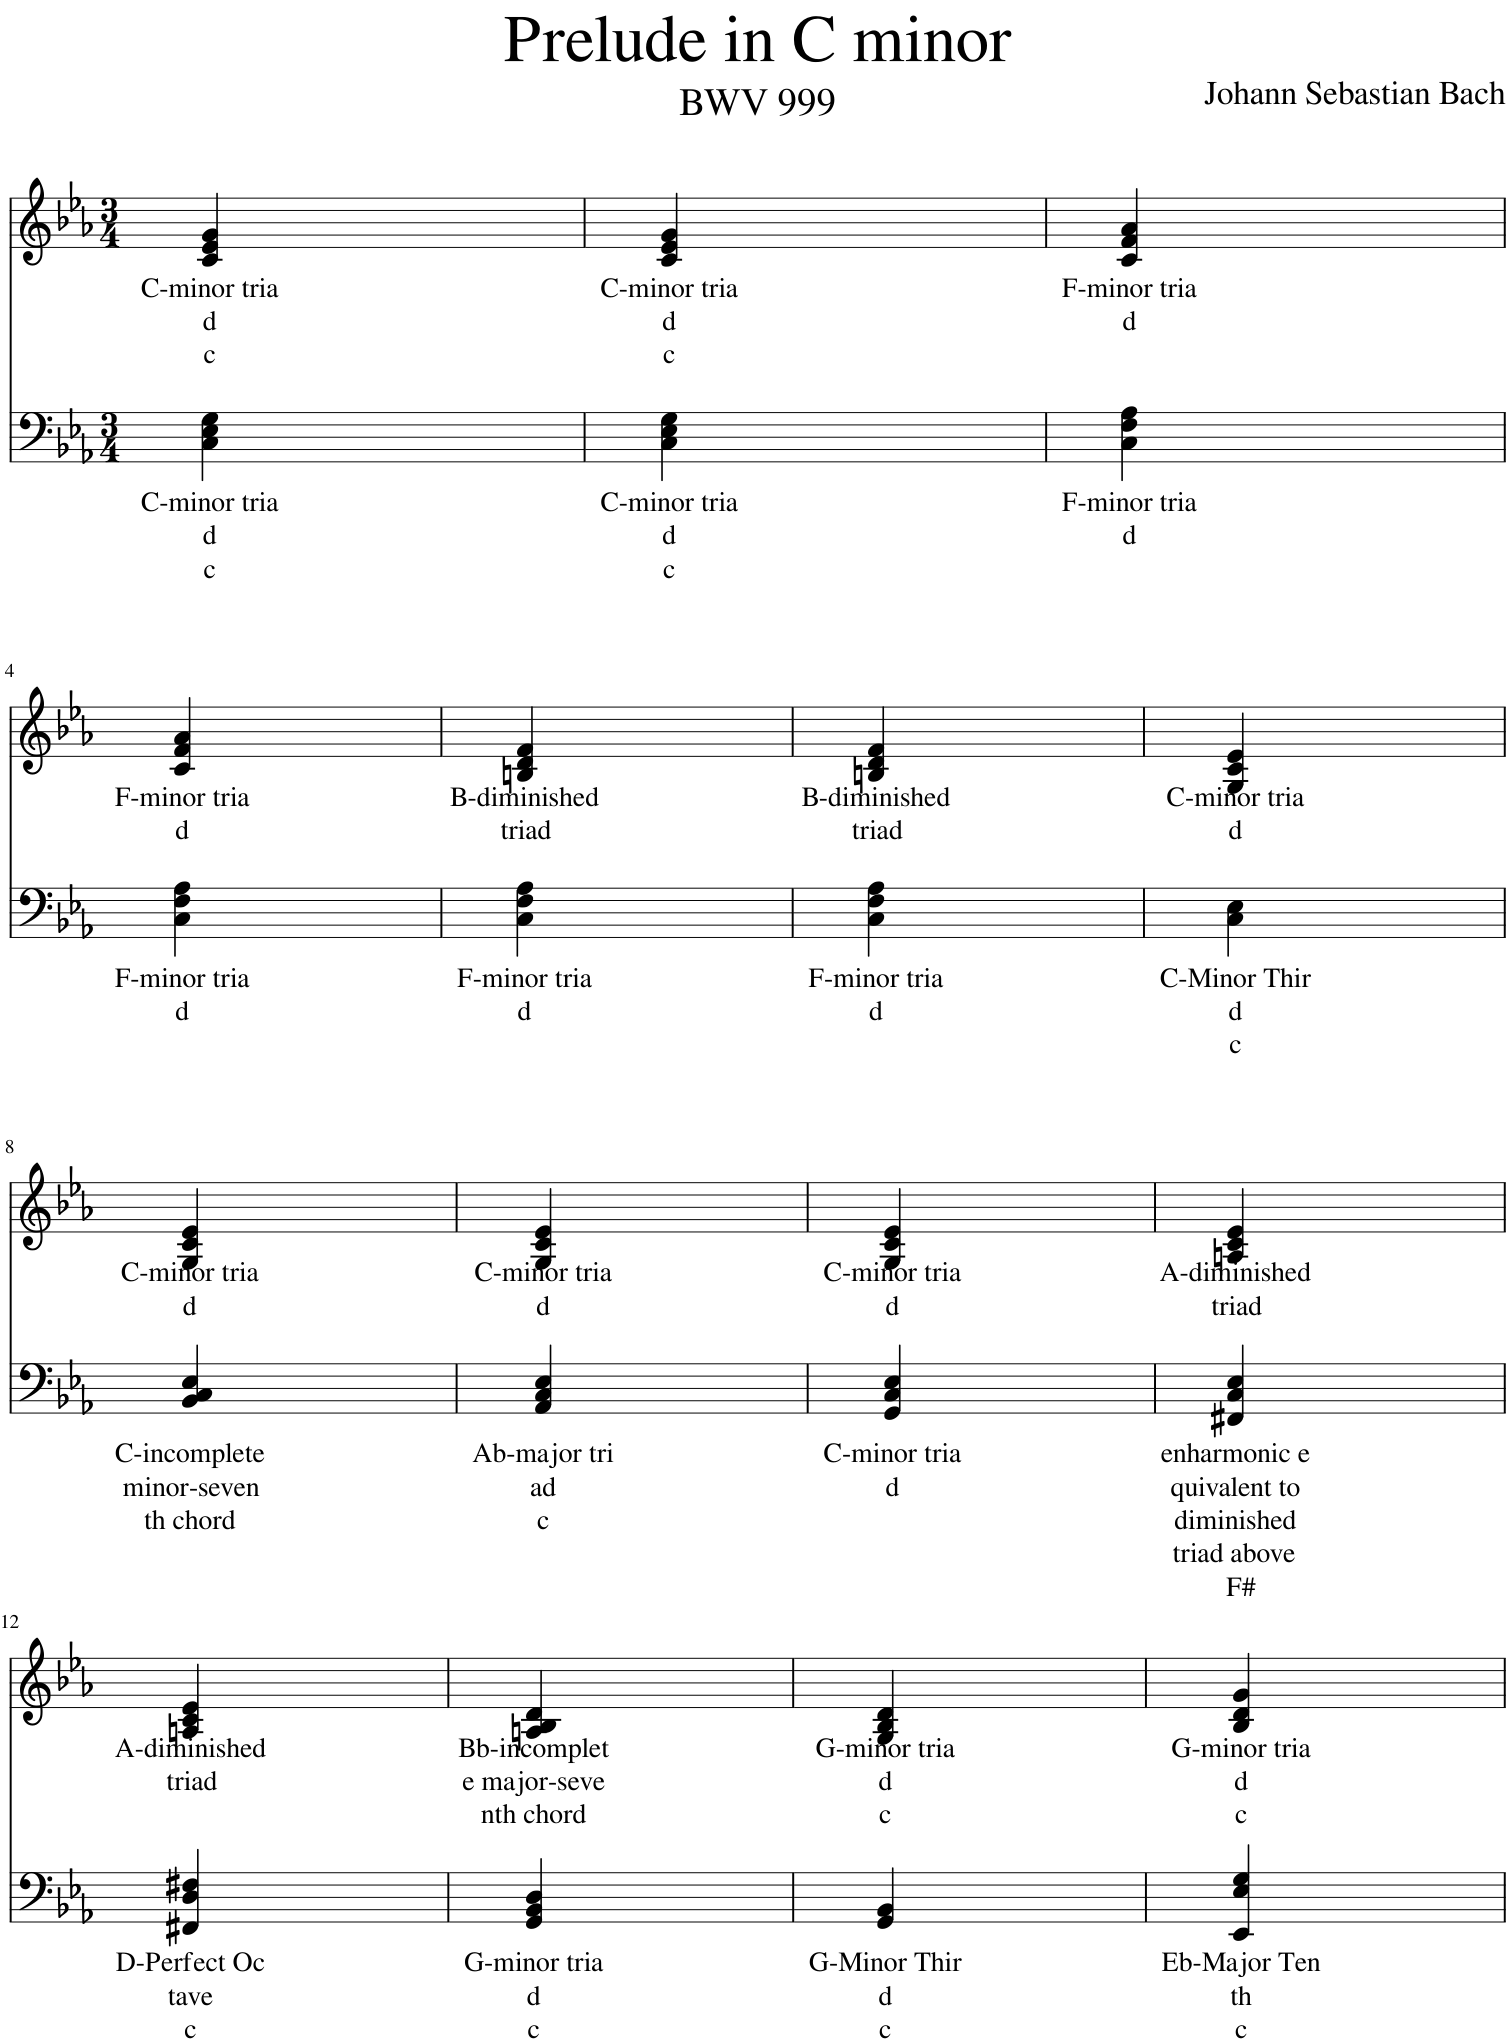

In [14]:
s.show()

In [15]:
s.write("musicxml","bwv999_onllychords_annot.xml")

'/content/bwv999_onllychords_annot.xml'